In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_of_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

matplotlib settings set


matplotlib settings set
This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in photometric prior mode

In [3]:
magnitude_columns = [
                    ('rel_dered_mag_g_orig', 'auto'),
                    ('rel_dered_mag_r_orig', 'auto'),
                    ('rel_dered_mag_z_orig', 'auto'),
                    ('rel_dered_mag_w1_orig', 'auto'),
                    ('rel_dered_mag_w2_orig', 'auto'),
                    ('rel_dered_g_r_orig', 'auto'),
                    ('rel_dered_r_z_orig', 'auto'),
                    ('rel_dered_g_z_orig', 'auto'),
                    ('rel_dered_z_w1_orig', 'auto'),
                    ('rel_dered_r_w2_orig', 'auto'),
                    ('rel_dered_w1_w2_orig', 'auto'),
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.656740,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.689910,1.969860e-12,NaN
2,2,b'SRGe J110537.6+585120',166.406669,58.855424,0.668180,1.505411e-12,NaN
3,3,b'SRGe J102349.9+563347',155.958041,56.563186,0.652214,1.001123e-12,NaN
4,4,b'SRGe J105057.2+593215',162.738144,59.537414,0.656779,9.137326e-13,NaN
...,...,...,...,...,...,...,...
9213,9210,b'SRGe J102315.1+561957',155.813071,56.332561,3.950350,1.637604e-15,NaN
9214,9211,b'SRGe J102332.5+562524',155.885436,56.423270,3.220603,1.608667e-15,NaN
9215,9212,b'SRGe J102235.0+561919',155.645874,56.321872,3.025501,1.595806e-15,NaN
9216,9213,b'SRGe J102223.5+562357',155.597875,56.399058,3.296691,1.532857e-15,NaN


In [4]:
ero_ctps_pandas

,ID,desi_id_true_ctp
0,b'SRGe J103105.9+573747',b'9011_610714_1440'
1,b'SRGe J103118.8+574434',b'9011_610714_1908'
2,b'SRGe J103123.8+574309',b'9011_610714_2092'
3,b'SRGe J103130.8+573932',b'9011_610714_2412'
4,b'SRGe J103137.0+573159',b'9011_609939_1093'
...,...,...
53,b'SRGe J105323.6+573829',b'hostless'
54,b'SRGe J105336.4+573800',b'hostless'
55,b'SRGe J105506.3+572958',b'hostless'
56,b'SRGe J105640.4+573203',b'hostless'


    adding angular separation columns
matching: 145069 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:03<00:00, 2898.24it/s]
Incorporating bias "DESI:rel_dered_mag_g_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_g_orig": 8959 secure matches, 10155 insecure matches and 1982976 secure non-matches of 2418574 total entries (1991935 valid)
magnitude histogram stored to "DESI_rel_dered_mag_g_orig_fit.txt".


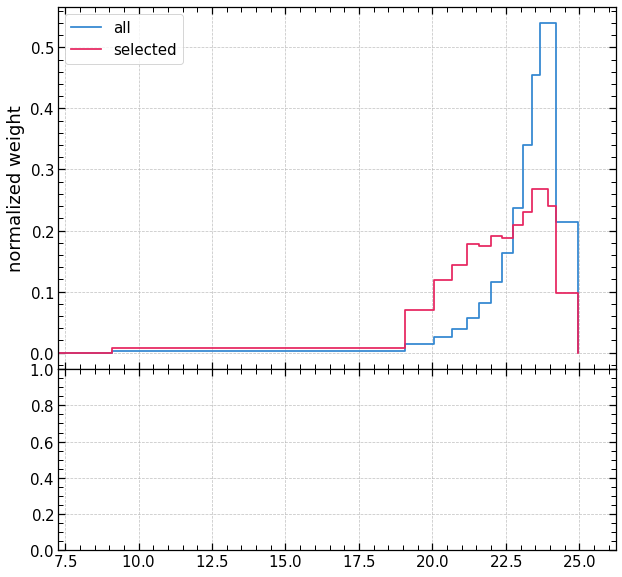

Incorporating bias "DESI:rel_dered_mag_r_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_r_orig": 9433 secure matches, 10155 insecure matches and 2120177 secure non-matches of 2418574 total entries (2129610 valid)
magnitude histogram stored to "DESI_rel_dered_mag_r_orig_fit.txt".


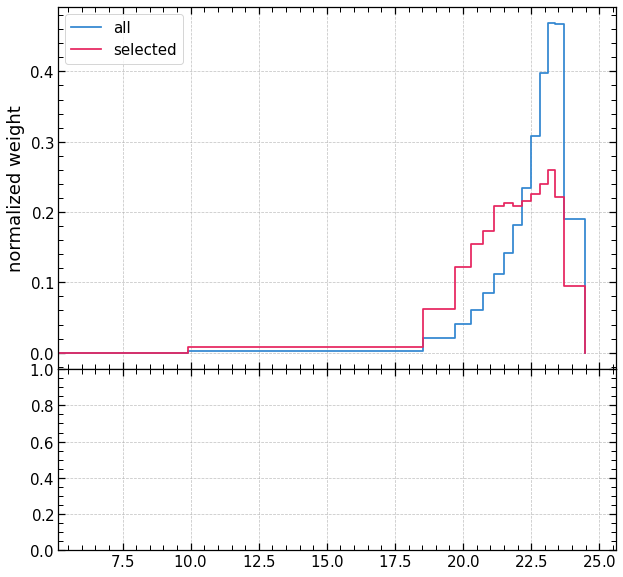

Incorporating bias "DESI:rel_dered_mag_z_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_z_orig": 9755 secure matches, 10155 insecure matches and 2249950 secure non-matches of 2418574 total entries (2259705 valid)
magnitude histogram stored to "DESI_rel_dered_mag_z_orig_fit.txt".


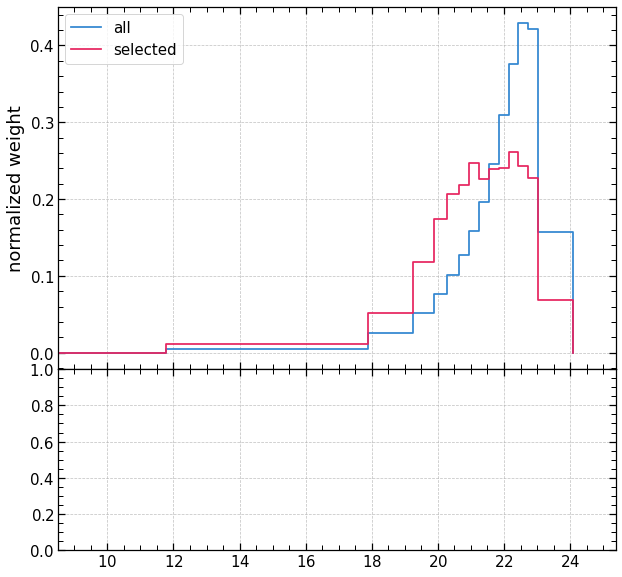

Incorporating bias "DESI:rel_dered_mag_w1_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_w1_orig": 8684 secure matches, 10155 insecure matches and 1562025 secure non-matches of 2418574 total entries (1570709 valid)
magnitude histogram stored to "DESI_rel_dered_mag_w1_orig_fit.txt".


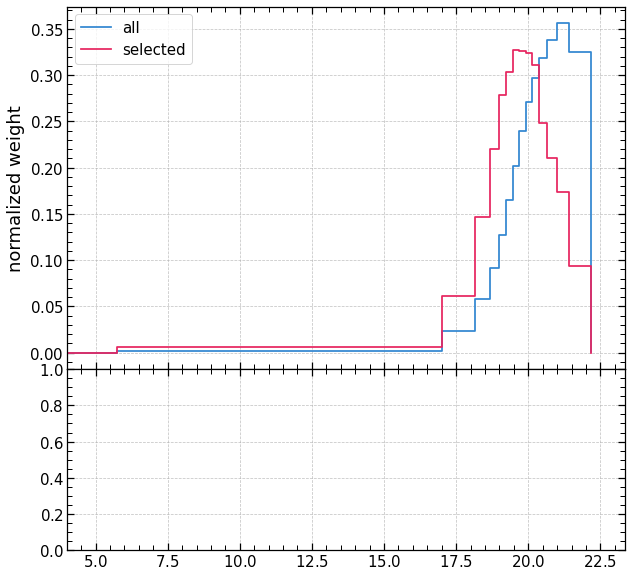

Incorporating bias "DESI:rel_dered_mag_w2_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_w2_orig": 7762 secure matches, 10155 insecure matches and 972652 secure non-matches of 2418574 total entries (980414 valid)
magnitude histogram stored to "DESI_rel_dered_mag_w2_orig_fit.txt".


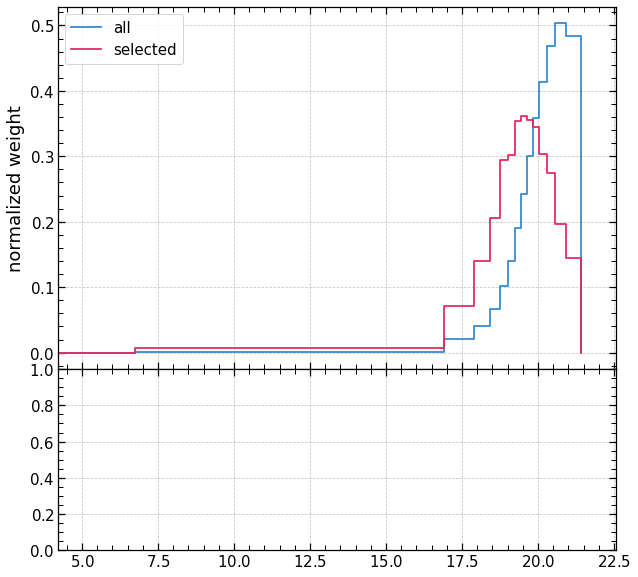

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:rel_dered_g_r_orig" ...
magnitude histogram of column "DESI_rel_dered_g_r_orig": 8734 secure matches, 10155 insecure matches and 1860387 secure non-matches of 2418574 total entries (1869121 valid)
magnitude histogram stored to "DESI_rel_dered_g_r_orig_fit.txt".


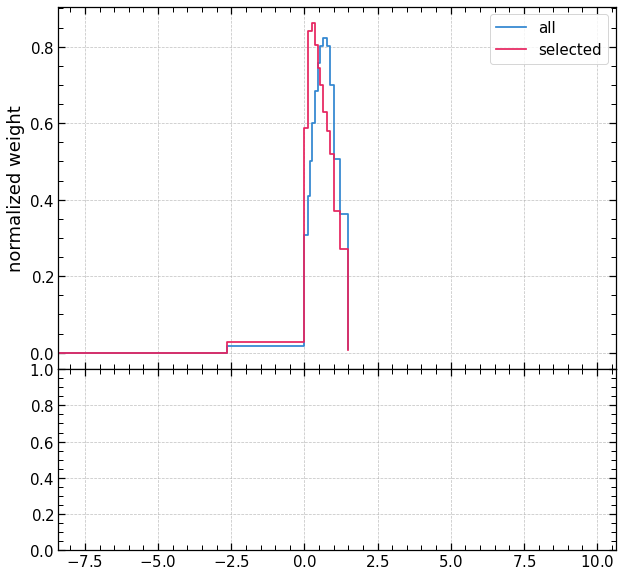

Incorporating bias "DESI:rel_dered_r_z_orig" ...
magnitude histogram of column "DESI_rel_dered_r_z_orig": 9162 secure matches, 10155 insecure matches and 1996374 secure non-matches of 2418574 total entries (2005536 valid)
magnitude histogram stored to "DESI_rel_dered_r_z_orig_fit.txt".


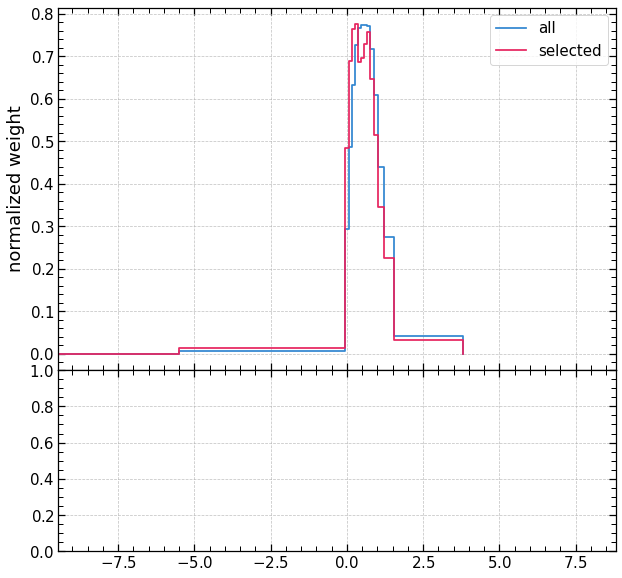

Incorporating bias "DESI:rel_dered_g_z_orig" ...
magnitude histogram of column "DESI_rel_dered_g_z_orig": 8638 secure matches, 10155 insecure matches and 1832582 secure non-matches of 2418574 total entries (1841220 valid)
magnitude histogram stored to "DESI_rel_dered_g_z_orig_fit.txt".


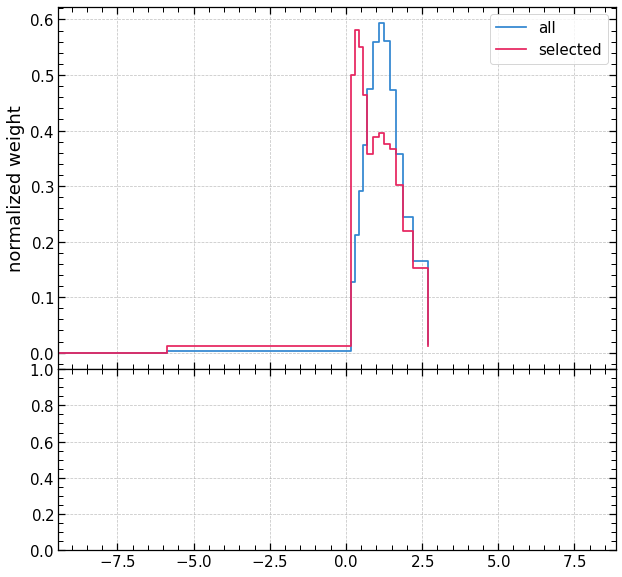

Incorporating bias "DESI:rel_dered_z_w1_orig" ...
magnitude histogram of column "DESI_rel_dered_z_w1_orig": 8549 secure matches, 10155 insecure matches and 1523769 secure non-matches of 2418574 total entries (1532318 valid)
magnitude histogram stored to "DESI_rel_dered_z_w1_orig_fit.txt".


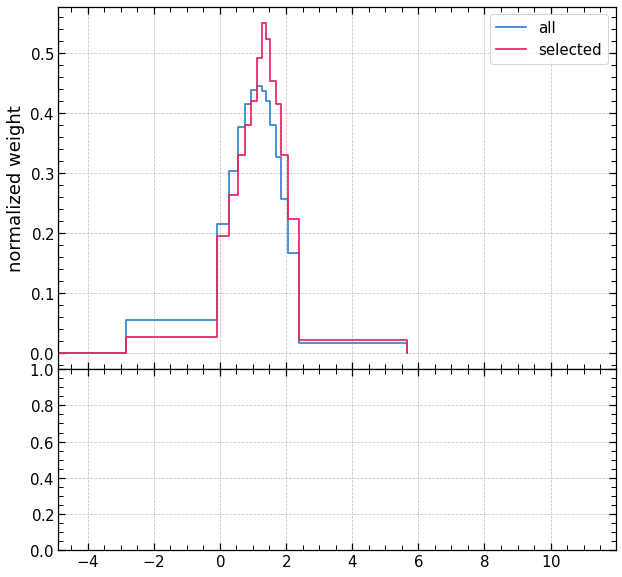

Incorporating bias "DESI:rel_dered_r_w2_orig" ...
magnitude histogram of column "DESI_rel_dered_r_w2_orig": 7373 secure matches, 10155 insecure matches and 867058 secure non-matches of 2418574 total entries (874431 valid)
magnitude histogram stored to "DESI_rel_dered_r_w2_orig_fit.txt".


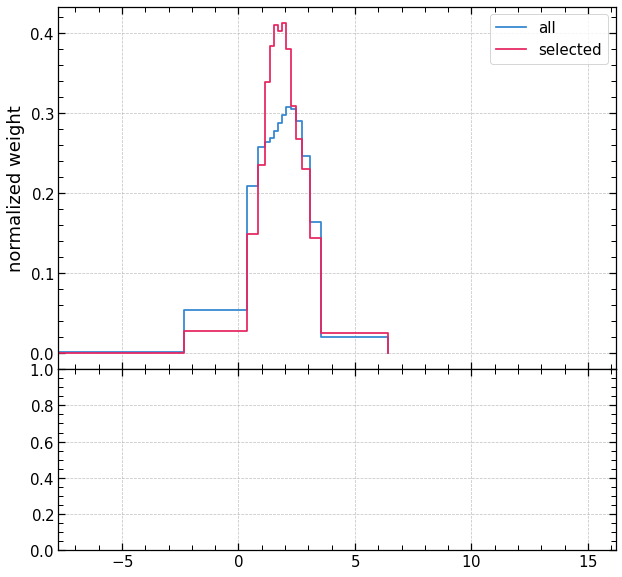

Incorporating bias "DESI:rel_dered_w1_w2_orig" ...
magnitude histogram of column "DESI_rel_dered_w1_w2_orig": 7651 secure matches, 10155 insecure matches and 942229 secure non-matches of 2418574 total entries (949880 valid)
magnitude histogram stored to "DESI_rel_dered_w1_w2_orig_fit.txt".


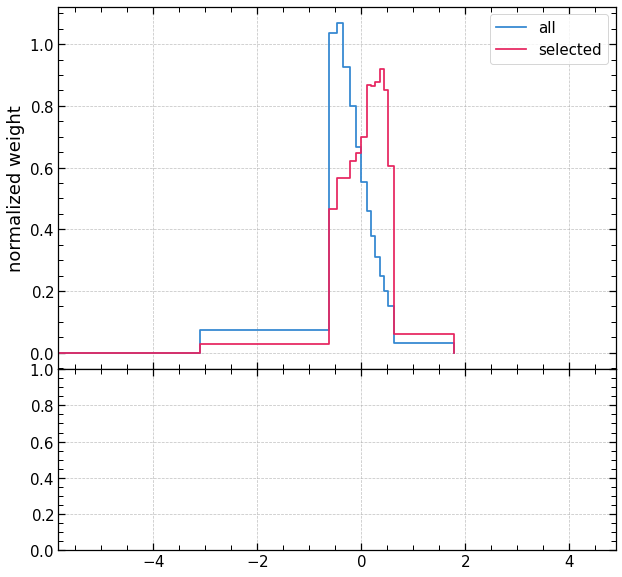


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [5]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


In [6]:
os.system('rm DESI*_fit.txt')

0

In [7]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])

 Completeness = 93% 
 Purity = 93% 
 prob_has_match optimal cutoff =  0.4 
 Fraction of sources with prob_has_match > 0.4 = 82%


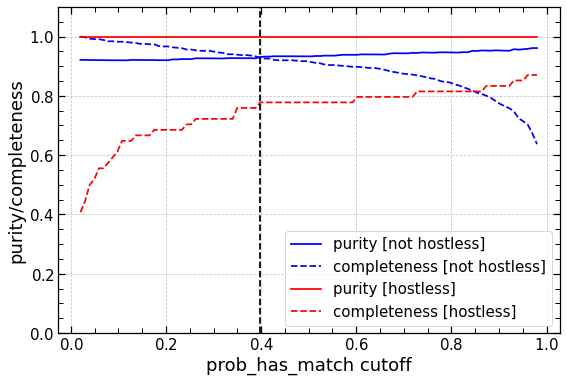

 NOT HOSTLESS 
assigned NOT HOSTLESS: 637
assigned NOT HOSTLESS with correct match: 593
total: 686
purity [assigned NOT HOSTLESS correctly / all NOT HOSTLESS]: 0.9309262166405023
completeness [all NOT HOSTLESS / total NOT HOSTLESS]: 0.9285714285714286
 HOSTLESS 
assigned HOSTLESS: 42
assigned HOSTLESS correctly: 42
total HOSTLESS: 54
purity [assigned HOSTLESS correctly / all assigned HOSTLESS]: 1.0
completeness [all HOSTLESS assigned / total HOSTLESS]: 0.7777777777777778


In [8]:
assess_goodnes_of_cross_match(nway_res_ero);